In [15]:
import pandas as pd

url='/Users/thomasantomoothedan/Desktop/Credit Card Fraud Detection/creditcard.csv'
data=pd.read_csv(url)

print(data.head())

print(data.isnull().sum())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [16]:
from imblearn.over_sampling import SMOTE

X=data.drop('Class',axis=1)
y=data['Class']

smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)

print(y_res.value_counts())

/Users/thomasantomoothedan/Desktop/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class
0    284315
1    284315
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler
import joblib

scalar = StandardScaler()
X_res['Amount']=scalar.fit_transform(X_res[['Amount']])
joblib.dump(scalar, 'scaler.pkl')

print(X_res.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import joblib

X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

rf_model.fit(X_train,y_train)

xsy_pred=rf_model.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


joblib.dump(rf_model, 'random_forest_model.pkl')


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56739    11]
 [    0 56976]]


['random_forest_model.pkl']

In [19]:
from sklearn.linear_model import LogisticRegression
import joblib

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

joblib.dump(logreg_model, 'logreg_model.pkl')

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

[[56218   532]
 [ 1671 55305]]


/Users/thomasantomoothedan/Desktop/Credit Card Fraud Detection/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logreg_model.pkl']

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train,y_train)

y_pred_knn=knn_model.predict(X_test)

print("KNN Classifier:")
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

joblib.dump(knn_model, 'knn_model.pkl')


KNN Classifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56750
           1       0.98      0.98      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

[[55797   953]
 [ 1196 55780]]


['knn_model.pkl']

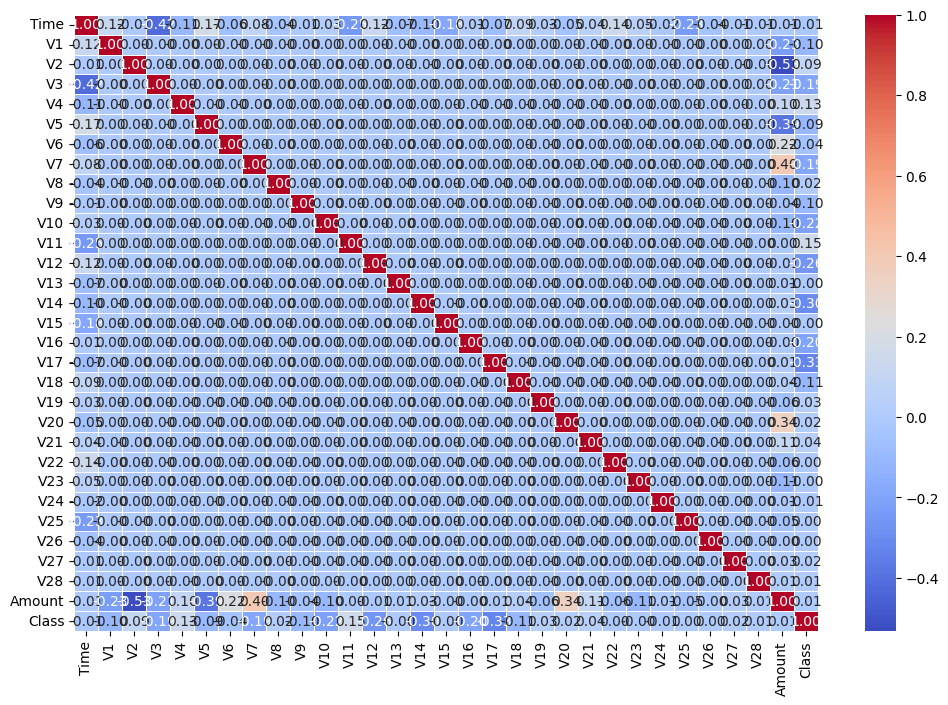

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url='creditcard.csv'
data = pd.read_csv(url)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Save the heatmap as an image
heatmap_path = 'static/images/heatmap.png'
plt.savefig(heatmap_path)

# Display the heatmap
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming X_res contains the features to scale
scaler = StandardScaler()

# Fit and transform the training data
X_scaled = scaler.fit_transform(X_res)

# Save the scaler to a .pkl file
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl


In [24]:
# Correct way in your notebook:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_res['Amount'] = scaler.fit_transform(X_res[['Amount']])
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

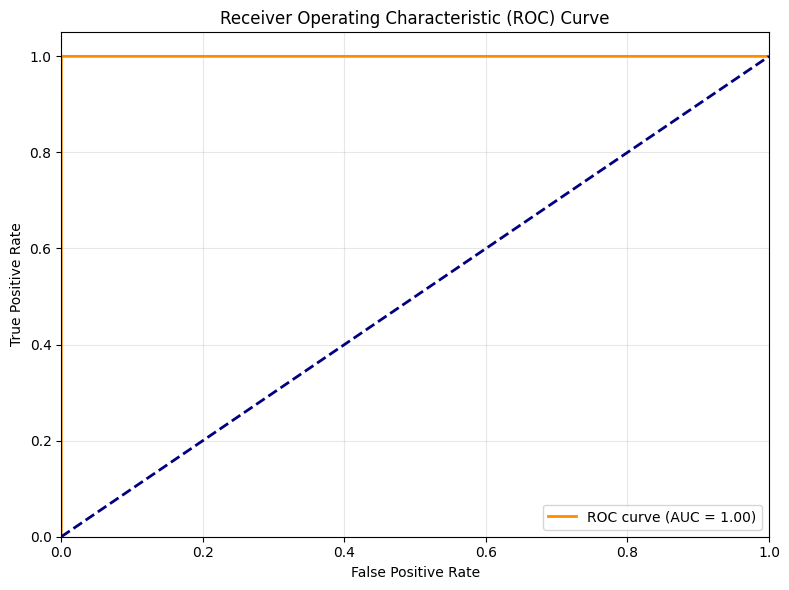

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib

# Load your test data and model
# X_test, y_test should already be defined from your notebook
# rf_model = joblib.load('random_forest_model.pkl')

# Get predicted probabilities for the positive class
y_score = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('static/images/roc_curve.png')
plt.show()

/var/folders/4m/qsm2jbsd3rs539kfhjxk6ty00000gn/T/ipykernel_82880/2858893869.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


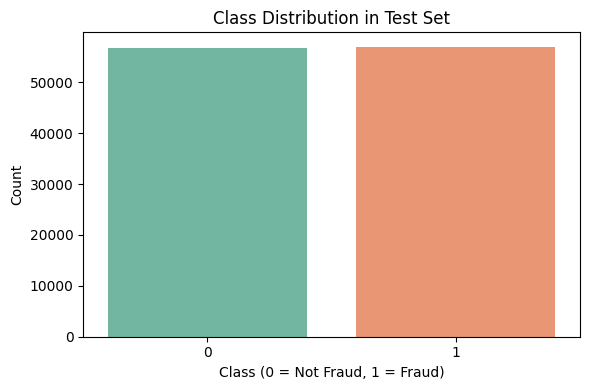

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# If you have y_test as a pandas Series:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette='Set2')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('static/images/class_distribution.png')
plt.show()